In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head(10).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [44]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (768, 9)
Size of Diabetes dataset is  : 6912


In [45]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [47]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

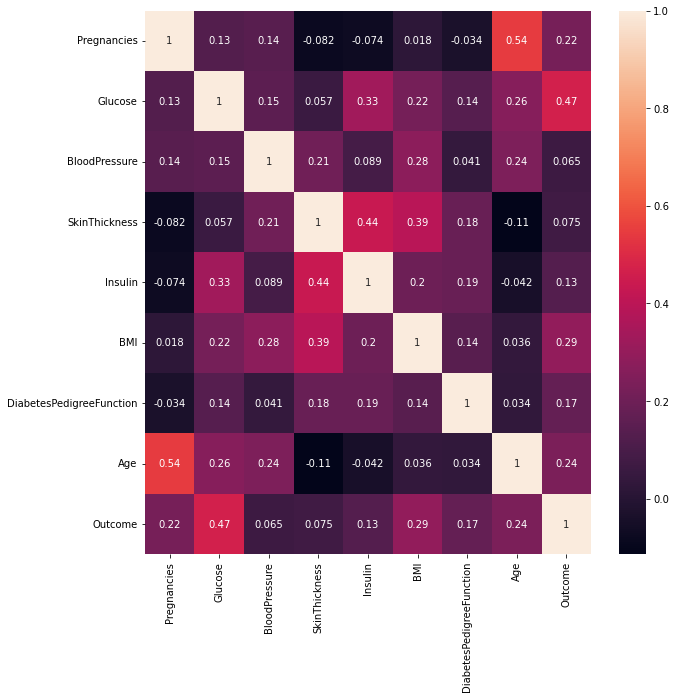

In [12]:
plt.figure(figsize=(10,10))
corrmat=dataframe.corr()
sns.heatmap(corrmat, annot=True)

In [49]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [50]:
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].median())#skewed distribution

In [51]:
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [52]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

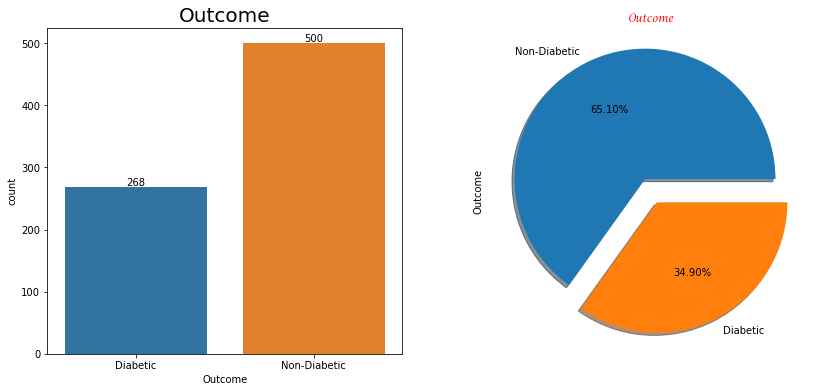

In [53]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [54]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]
Diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,Diabetic
2,8,183.0,64.0,23,30.5,23.3,0.672,32,Diabetic
4,0,137.0,40.0,35,168.0,43.1,2.288,33,Diabetic
6,3,78.0,50.0,32,88.0,31.0,0.248,26,Diabetic
8,2,197.0,70.0,45,543.0,30.5,0.158,53,Diabetic


In [55]:
Diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164
std,3.741239,29.545943,12.016572,9.676886,127.689084,6.596704,0.372354,10.968254
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000
25%,1.750000,119.000000,68.000000,23.000000,30.500000,30.900000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,30.500000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [56]:
Non_diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,3.298000,110.705367,70.810008,26.058000,83.1880,30.880200,0.429734,31.190000
std,3.017185,24.715021,11.932269,8.725532,89.5657,6.503074,0.299085,11.667655
min,0.000000,44.000000,24.000000,7.000000,15.0000,18.200000,0.078000,21.000000
25%,1.000000,93.000000,63.500000,22.000000,30.5000,25.750000,0.229750,23.000000
50%,2.000000,107.500000,70.000000,23.000000,39.0000,30.400000,0.336000,27.000000
75%,5.000000,125.000000,78.000000,31.000000,105.0000,35.300000,0.561750,37.000000
max,13.000000,197.000000,122.000000,60.000000,744.0000,57.300000,2.329000,81.000000


In [57]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 576
patient count having prediabetes : 192
patient count having abnormal glucose : 0


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

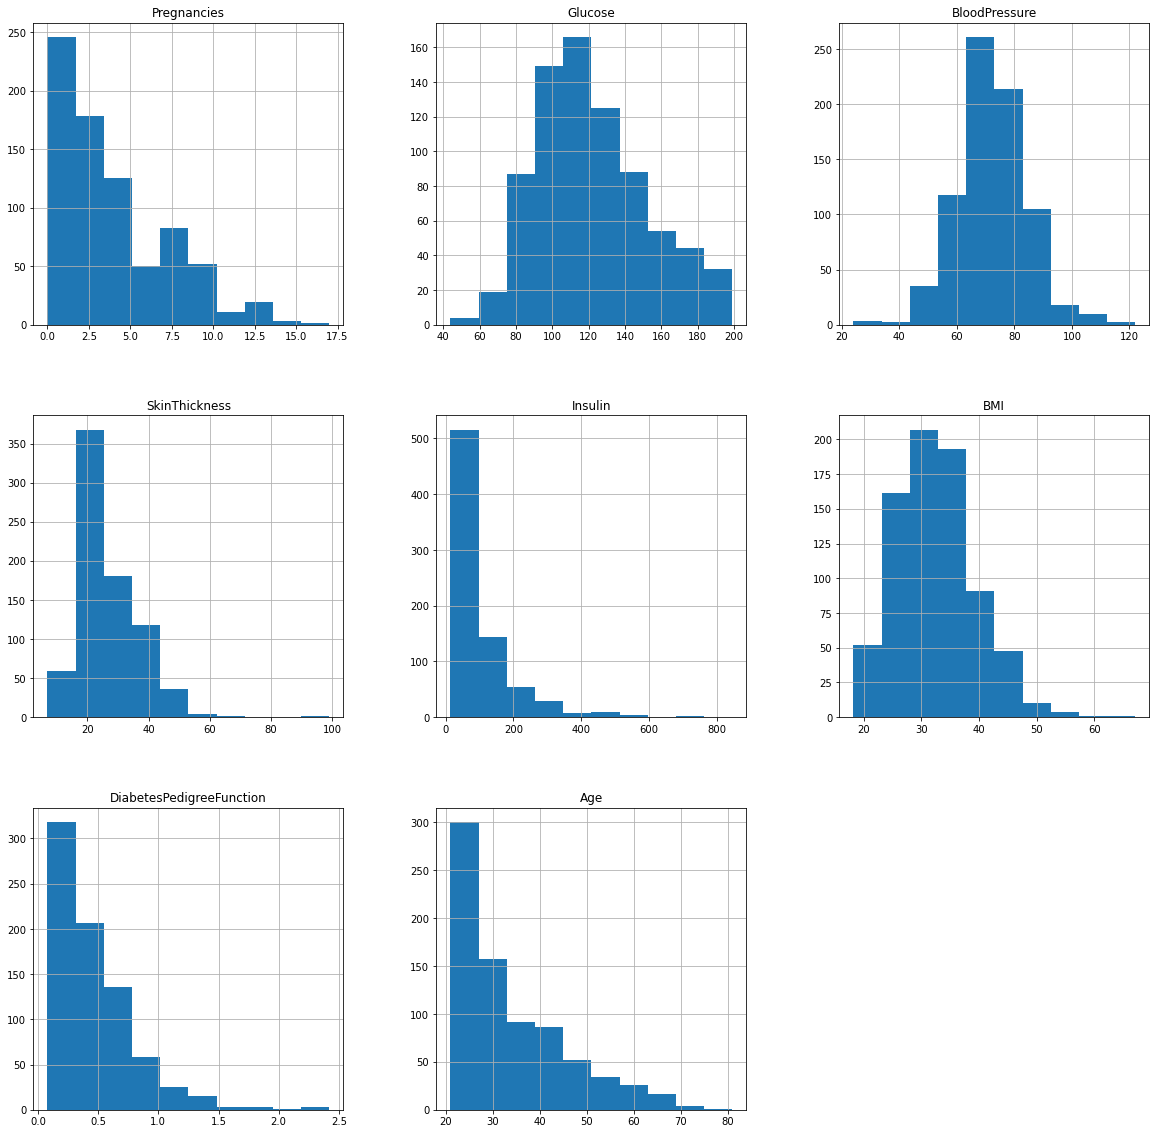

In [58]:
dataframe.hist(figsize = (20,20))

In [59]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [60]:
# Feature Selection
df_selected=dataframe.copy(deep=True)

# Handling Outliers

# Quantile Transformer 
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [61]:
X = df_new.drop(columns='Outcome', axis=1)
Y = df_new['Outcome']
X.head() # independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258


In [62]:
Y.tail()

763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, dtype: float64

# Train and Split

In [63]:
from sklearn.model_selection import train_test_split
 # Splittingin the ratio of 60% for train, 40% for test.
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=12) 
X_train.shape, y_train.shape

((537, 8), (537,))

In [64]:
X_test.shape, y_test.shape

((231, 8), (231,))

# Logistic Regression

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 75.98 %
Model Accuracy Score : 77.92 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.73      0.63      0.68        84

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

--------------------------------------------------------


# Support Vector Machine

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 81.56 %
Model Accuracy Score : 77.06 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.71      0.62      0.66        84

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

--------------------------------------------------------


# Decision Tree classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 68.83 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       147
         1.0       0.57      0.61      0.59        84

    accuracy                           0.69       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.69      0.69      0.69       231

--------------------------------------------------------


# K-Nearest Neighbour

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 85.85 %
Model Accuracy Score : 73.16 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       147
         1.0       0.65      0.56      0.60        84

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231

--------------------------------------------------------


# comparing different model

In [69]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy]})

models.sort_values(by='Model Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })



Model,Training Accuracy,Model Accuracy
Logistic Regression,75.980000,77.920000
Support Vector Machines,81.560000,77.060000
KNN,85.850000,73.160000
Decission Tree,100.000000,68.830000


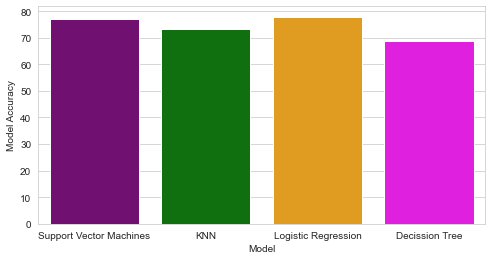

In [71]:
colors = ["purple", "green", "orange", "magenta","blue","black"]
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()

# Final Prediction

In [14]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (2,95,90,40,150,24,0.727000,20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[  2.     95.     90.     40.    150.     24.      0.727  20.   ]]


In [15]:
# predict
predictions = logic.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")

NameError: name 'logic' is not defined